## **Object Detection with MobileNet SSD**

**Elahe Khodaverdi - Fereshte Bagheri**

---

## **Description**

The Object Detection project processes images and video frames to detect and annotate objects using the MobileNet SSD (Single Shot MultiBox Detector) model. The project utilizes OpenCV's deep learning framework to load the pre-trained model and perform object detection. Each detected object is highlighted with a bounding box, and a label showing the object's class name and confidence score is added to the frame. The project supports both static image processing and real-time object detection from video sources, such as webcam or video files. The resulting frames or images can be displayed and optionally saved for further analysis or use.

---

## **Requirements**
- **Libraries**: OpenCV, NumPy, Matplotlib
- **File Structure**:
  - Input images stored in `images/`
  - Input video files stored in `videos/`
  - Processed results saved in the output directories (`outputImages/`) and (`outputVideos/`)

---

## **Outputs**
1. **Images**:
   - Original image
   - Image with detected objects and bounding boxes

2. **Videos**:
   - Original video frames with detected objects and bounding boxes
   - Video with the processed frames saved to the output directory
---

## **Algorithm Details**

1. **Object Detection Setup**:
   - Loads the MobileNet SSD model using pre-trained weights and deployable architecture files (`deploy.prototxt` and `mobilenet_iter_73000.caffemodel`).
   - Initializes the model to detect objects in images and video frames based on a predefined set of class labels.

2. **Object Detection**:
   - Converts the input image to a blob suitable for the neural network.
   - Passes the blob through the MobileNet SSD model to get predictions.
   - Filters predictions based on a confidence threshold to ensure that only reliable detections are considered.
   - Draws bounding boxes around detected objects, labeling them with the class name and confidence score.

3. **Processing**:
   - Iterates through the input video frames or images.
   - Processes each frame using the object detection function, applying bounding boxes and labels.
   - Optionally, adds an FPS counter to each processed frame for real-time feedback.

4. **Output Generation**:
   - The results are displayed using `Matplotlib` for images and `OpenCV` for video frames.
   - The processed images and videos are optionally saved to the output directory for later use.

# Real-time Object Detection
### Complete # TODO

# Requirements

In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
import time

# Loading Model

In [2]:
PROTOTXT_ADDRESS = os.path.join("model", "deploy.prototxt")
MODEL_ADDRESS = os.path.join("model", "mobilenet_iter_73000.caffemodel")
CONFIDENCE = 0.2

# initialize the list of class labels MobileNet SSD was trained to
# detect, then generate a set of bounding box colors for each class
CLASSES = [
    "background",
    "aeroplane",
    "bicycle",
    "bird",
    "boat",
    "bottle",
    "bus",
    "car",
    "cat",
    "chair",
    "cow",
    "diningtable",
    "dog",
    "horse",
    "motorbike",
    "person",
    "pottedplant",
    "sheep",
    "sofa",
    "train",
    "tvmonitor",
]

COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

# load our serialized model from disk
net = cv2.dnn.readNetFromCaffe(PROTOTXT_ADDRESS, MODEL_ADDRESS)

# Object Detection Function

In [3]:
def detect_object(frame, network):
    # grab the frame dimensions and convert it to a blob
    (h, w) = frame.shape[:2] # TODO
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 0.007843, (300, 300), 127.5) # TODO

    # pass the blob through the network and obtain the detections and predictions
    # TODO
    network.setInput(blob)
    detections = network.forward() # TODO

    # loop over the detections
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with
		# the prediction
        confidence = detections[0, 0, i, 2]

        # filter out weak detections by ensuring the `confidence` is
		# greater than the minimum confidence
        if confidence > CONFIDENCE:
            # extract the index of the class label from the
			# `detections`, then compute the (x, y)-coordinates of
			# the bounding box for the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype('int')

            # draw the prediction on the frame
            label = "{}: {:.2f}%".format(CLASSES[idx], confidence * 100)
            cv2.rectangle(frame, (startX, startY), (endX, endY), COLORS[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(frame, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx], 2)
    return frame

# Testing Object Detection Function

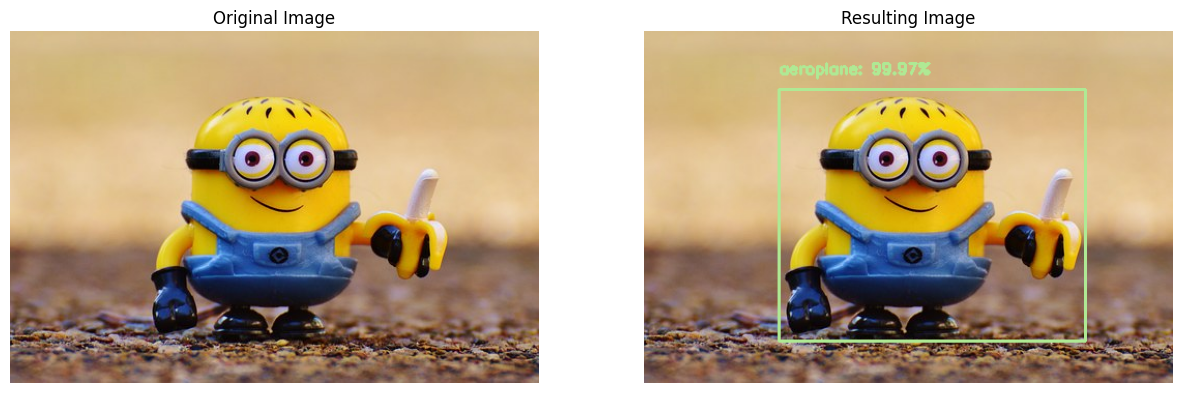

In [12]:
# Read the input image from the specified file path
image = cv2.imread("images/minion.jpg")  # TODO

# Convert the image from RGB to BGR color space (OpenCV uses BGR by default)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # TODO

resulting_image = detect_object(image.copy(), net)
cv2.imwrite("outputImages/result_image.jpg", cv2.cvtColor(resulting_image, cv2.COLOR_RGB2BGR))
# resulting_image = cv2.cvtColor(resulting_image, cv2.COLOR_BGR2RGB)


# Create a figure for displaying images with a specified size of 10x10 inches
# TODO
plt.figure(figsize=(15, 15))


plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(resulting_image)
plt.title("Resulting Image")
plt.axis("off")

plt.show()

# Real-time Object Detection Using WebCam

In [5]:
def visualize_fps(image, fps: int):
    # Check if the image is grayscale or colored.
    # If it's grayscale, set text color to white; if colored, set text color to green.
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)  # White color for grayscale images.
    else:
        text_color = (0, 255, 0)  # Green color for colored images.

    # Define the row size for the text placement.
    row_size = 20 
    # Define the left margin for the text placement.
    left_margin = 24 

    # Set the font size and thickness for the text.
    font_size = 1
    font_thickness = 2

    # Format the FPS value into a string for displaying.
    fps_text = "FPS = {:.1f}".format(fps)
    # Set the text location on the image.
    text_location = (left_margin, row_size)
    
    # Place the FPS text on the image.
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )

    # Return the modified image with the FPS text.
    return image

In [13]:
# Constants for camera settings
CAMERA_DEVICE_ID = 0  # ID for the camera device
IMAGE_WIDTH = 800  # Width of the captured image
IMAGE_HEIGHT = 600  # Height of the captured image
fps = 0  # Initial Frames Per Second (FPS) value

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID) # TODO # Initialize video capture with the specified camera device ID
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, IMAGE_WIDTH)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, IMAGE_HEIGHT)

        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter("outputVideos/camera_result_video.avi", fourcc, 7, (IMAGE_WIDTH, IMAGE_HEIGHT))

        while True:  # Infinite loop to continuously capture frames

            start_time =  time.time() # TODO  # Record the start time to calculate FPS

            _, frame =  cap.read() # TODO  # Capture a single frame from the camera

            frame =  cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT)) # TODO  # Resize the frame to the specified dimensions

            frame =  detect_object(frame, net) # TODO
            out.write(frame)

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps)) 

            end_time =  time.time() # TODO  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds =  end_time - start_time # TODO 
            # Calculate FPS based on the time taken to process the frame
            fps =  1 / seconds # TODO

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:  
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the camera resource
        out.release()

# Real-time Object Detection Using Video Stream

In [14]:
# Constants for video settings
# Define the path to the video file using os.path.join
CAMERA_DEVICE_ID = os.path.join("videos", "1.mp4")  # Path to the video file
IMAGE_WIDTH = 1000  # Width of the displayed image
IMAGE_HEIGHT = 600  # Height of the displayed image
fps = 0  # Initial Frames Per Second (FPS) value
FRAME_RATE = 30  # Desired frame rate
DURATION = 1 / FRAME_RATE  # Duration of each frame

if __name__ == "__main__":  # Ensures that the code only runs when executed directly
    try:
        cap =  cv2.VideoCapture(CAMERA_DEVICE_ID) # TODO # Initialize video capture with the specified video file path
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter("outputVideos/result_video.avi", fourcc, 7, (IMAGE_WIDTH, IMAGE_HEIGHT))

        while True:  # Infinite loop to continuously capture frames
            start_time =  time.time() # TODO # Record the start time to calculate FPS

            _, frame =  cap.read() # TODO  # Capture a single frame from the video
            frame =  cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT)) # TODO  # Resize the frame to the specified dimensions
            frame = detect_object(frame, net) # TODO # Detect objects using detect_object()
            out.write(frame)
            end_time = time.time() # TODO  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time - start_time # TODO

            # If the processing time is less than the desired frame duration, wait for the remaining time
            if seconds < DURATION:
                time.sleep(DURATION - seconds)

            # Recalculate the time taken to process the frame including sleep time
            seconds = time.time() - start_time # TODO
            # Calculate FPS based on the time taken to process the frame
            fps = 1 / seconds # TODO

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps))

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:  
                break
    except Exception as e:  # Handle exceptions that may occur
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the video capture resource
        out.release()

OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

